### Classification (Clasificación)

So far, in detection, we've tried to *decide* between two hypotheses: signal present or not. In classification, the problem is an extension: we have to *assign* an observed data point to one of several predefined categories or classes.

#### **What is Classification?**

*   **Concept:** Classification is a machine learning task where we assign a given input data point to one of several predefined, discrete categories or "classes." It's about labeling data based on its characteristics.
*   **The Challenge:** Similar to detection, observations are often noisy or complex, making it non-trivial to draw clear lines between classes. We need a "classifier" that learns from examples to make accurate assignments.

*   **Examples:**
    *   **Medical Diagnosis:** Assigning a patient's symptoms to "Influenza," "Common Cold," or "COVID-19."
    *   **Email Management:** Categorizing an email as "Primary," "Promotions," "Social," or "Spam."
    *   **Image Recognition:** Identifying the object in an image as "Cat," "Dog," "Bird," or "Car."
    *   **Quality Control:** Labeling a product as "Good," "Minor Defect," or "Major Defect."

**Visual Aid:** Here's an image illustrating how different data points might be separated into distinct classes.


#### **Binary Classification vs. Multi-hypothesis Classification**

This distinction is key to understanding the scope of classification problems.

*   **Binary Classification:**
    *   **Concept:** This is the most straightforward classification problem, where an input must be assigned to one of only **two possible classes**.
    *   **Relationship to Binary Detection:** Binary classification is conceptually very similar to binary hypothesis testing (detection). In fact, most binary detection problems can be framed as binary classification where the two classes are "signal present" and "signal absent." The fundamental challenge of distinguishing between two states based on observations remains.
    *   **Examples:**
        *   There is signal vs. there is no signal (radar example).
        *   Spam vs. Not Spam (Ham) email.
        *   True vs. False statement.
        *   Approved vs. Rejected loan application.
    *   **Output:** Typically, a score or probability that indicates the likelihood of belonging to one class (e.g., probability of being "spam"). A decision threshold is then applied to this score. (Probability of detection vs. Probability of False Alarm)

*   **Multi-hypothesis Classification (Multi-class Classification):**
    *   **Concept:** This extends binary classification to scenarios where there are **three or more possible classes**. An input data point must be assigned to *one and only one* of these distinct categories.
    *   **Examples:**
        *   Recognizing digits 0-9 from an image (10 classes).
        *   Categorizing news articles into "Sports," "Politics," "Science," "Art," etc.
        *   Identifying different types of defects on an assembly line (e.g., "Scratch," "Dent," "Color Mismatch," "No Defect").
    *   **Output:** Usually, a set of probabilities, one for each class, indicating how likely the input belongs to that class. The sum of these probabilities is 1. The class with the highest probability is chosen as the prediction.

**The Transition:** While detection focuses heavily on the presence or absence of a specific signal (often signal-in-noise), classification takes this one step further to encompass any arbitrary number of distinct categories, learning the complex boundaries between them.

#### **Principles of Classification**

Effective classification relies on understanding these basic components:

*   **Features ($\mathbf{x}$):** These are the measurable attributes or characteristics of the data point that the classifier uses to make a decision. Good features are crucial for good classification performance.
    *   *Example (Image of a fruit):* Color (R, G, B values), shape (aspect ratio), texture.
    *   *Example (Customer data):* Age, income, past purchase history, browsing behavior.
    *   *Example (dart game):* $X$ and $Y$ axis location of past throws.

*   **Labels ($y$):** These are the true, predefined categories to which each data point belongs. They serve as the "ground truth" during training.

*   **Training Data:** A collection of many data points, each consisting of its features ($\mathbf{x}$) and its corresponding correct label ($y$). The classifier "learns" from these examples to find patterns.

*   **Classifier (Model):** This is the algorithm or mathematical function that learns a mapping from the input features to the output labels. Its objective is to generalize, meaning it should accurately classify *new, unseen* data.

*   **Decision Boundary:** A conceptual boundary in the feature space that separates data points belonging to different classes. A classifier's job is to define these boundaries. In 2D, it might be a line or curve; in higher dimensions, it's a hyperplane.

#### **Connecting to Artificial Intelligence: Machine Learning and Neural Networks**

Classification is a cornerstone of modern Artificial Intelligence, particularly within the field of Machine Learning.

*   **Classification as a Core Machine Learning Task:**
    *   Many fundamental Machine Learning algorithms are designed for classification (e.g., Logistic Regression, Support Vector Machines, Decision Trees, K-Nearest Neighbors).
    *   Machine learning models learn to infer the decision boundaries directly from the training data, rather than requiring explicit, hand-coded rules for every possible scenario. This allows them to handle much more complex and varied data.

*   **The Power of Neural Networks in Classification:**
    *   **Introduction:** Neural Networks (NNs) are a class of powerful machine learning models inspired by the structure and function of biological brains. They are composed of layers of interconnected "neurons" that process information.
    *   **How they perform Classification:**
        *   Neural networks excel at learning highly intricate and non-linear decision boundaries, especially when dealing with complex data types like images, video, and natural language.
        *   The input features are fed into the first layer. Subsequent "hidden" layers extract and transform increasingly abstract features. The final "output" layer produces the classification prediction, often as probabilities for each class.
        *   **Deep Learning:** When neural networks have many hidden layers, they are referred to as "Deep Neural Networks," giving rise to the field of Deep Learning. Deep learning has revolutionized classification performance in areas like computer vision (e.g., face recognition) and natural language processing (e.g., sentiment analysis), enabling machines to achieve human-level or even superhuman performance on specific classification tasks.

**Summary:**
Classification is about assigning data points to discrete categories, extending beyond binary detection to multiple hypotheses. It's a fundamental task in Machine Learning, with Neural Networks providing powerful tools to build sophisticated classifiers capable of solving a vast array of real-world problems.


#### **Bayesian Classifiers**

Unlike the binary detection case, where we have only two possible hypotheses, $H_0$ and $H_1$, the classification problem is framed in a scenario of multiple hypotheses (or classes), $H_i$, with $\{i=0,...,M-1\}$, among which we will have to decide which one is most likely to have occurred, based on the observed data $\underline{x}$.

Using vector notation, whether the observations are $N$-dimensional, $\underline{x}=\{ x_1, x_2, ...,x_N \}$, or time-domain signals with $N$ samples, $\underline{x}=x[n]=\{ x[0], x[1], ...,x[N-1] \}$, the problem formulation would be as follows:

\begin{equation}
H_0 : \underline{x} = \underline{s}_0 + \underline{w}\\
H_1 : \underline{x} = \underline{s}_1 + \underline{w}\\
\vdots \\
H_{M-1} : \underline{x} = \underline{s}_{M-1} + \underline{w}\\
 \tag{1}
\end{equation}
where $\underline{w}$ represents the $N$ noise components (uncertainty). A particular case would be where $H_0$ is the null hypothesis, i.e., absence of a signal, $H_0 : \underline{x} = \underline{w}$.

In any case, with multiple hypotheses, it doesn't make sense to talk about Neyman-Pearson, which was one of the alternatives in binary hypothesis testing. We could only use the **Minimum Probability of Error (Min-PE)** criterion, which in this case would be calculated as:

\begin{equation}
P_E : \sum_{i,j=0,i\neq j}^{M-1}P(H_i|H_j)P(H_j)
 \tag{2}
\end{equation}

where $P(H_i|H_j)$ is the probability of choosing hypothesis $H_i$ when $H_j$ is true, and $P(H_j)$ is the prior probability of hypothesis $j$.

This is equivalent to choosing the hypothesis that maximizes the posterior probability, known as the **Maximum A Posteriori (MAP)** criterion, according to which we choose the $k$-th hypothesis if

\begin{equation}
P(H_k|\underline{x})>P(H_j|\underline{x}) \quad \forall j\neq k
 \tag{3}
\end{equation}

It is called posterior probability because it is calculated once the data or results of the experiment or measurement are known, in this case $\underline{x}$. According to this, Eq. (3) can be read as: once $\underline{x}$ has been observed, it is most probable that hypothesis $H_k$ occurred.

To calculate the posterior probability, we use Bayes' Theorem, such that:

\begin{equation}
P(H_k|\underline{x})=\frac{p(\underline{x}|H_k)\cdot P(H_k)}{P(\underline{x})}
 \tag{4}
\end{equation}
where $p(\underline{x}|H_k)$ is the probability density function (likelihood) of $\underline{x}$ under hypothesis $H_k$, $P(H_k)$ is the prior probability of hypothesis $k$, and $P(\underline{x})$ is the probability of the data (evidence).

Since in most cases, probability density functions are of the exponential type, we resort to the strategy of applying natural logarithms to both sides of the equality. This is because the logarithmic function preserves the trend of the function and is more mathematically tractable. Thus, for each hypothesis, we obtain what are called **discriminant functions $g_k(\underline{x})$**:

\begin{equation}
\ln{P(H_k|\underline{x})}=g_k(\underline{x})=\ln{p(\underline{x}|H_k)}+\ln{P(H_k)} - \ln{P(\underline{x})}
 \tag{5}
\end{equation}

In this way, the MAP criterion would consist of choosing the hypothesis with the largest discriminant, i.e.:

\begin{equation}
\underline{x} \in H_k \rightarrow g_k(\underline{x})>g_j(\underline{x}) \quad \forall j\neq k
\tag{6}
\end{equation}

#### **Example Classification Method: Naive Bayesian Classifiers**

After understanding the basic principles of classification, let's explore a simple yet powerful probabilistic classifier: the Naive Bayesian Classifier.

##### **a) What is a Naive Bayesian Classifier?**

*   **Concept:** A Naive Bayesian classifier is a probabilistic machine learning model based on **Bayes' Theorem** with a "naive" independence assumption between features. Despite this simplification, it often performs surprisingly well in many real-world classification tasks.
*   **Intuition:** It calculates the probability of an observation belonging to a particular class, given its features, and then simply chooses the class with the highest probability.

##### **b) The "Naive" Assumption**

*   **Key Assumption:** The "naive" part comes from the assumption that **all features are independent of each other**, given the class.
    *   *Example (Classifying an email as Spam/Not Spam):* If an email contains both the word "free" and the word "money", a Naive Bayes classifier assumes that the presence of "free" is independent of the presence of "money" *given that the email is spam*.
*   **Why is it "naive"?** In reality, features are often correlated (e.g., if you see "free", you're more likely to see "money" in spam emails). However, this simplification drastically reduces computational complexity and works well because the model is often more concerned with the *overall probability* of a class rather than perfectly modeling feature dependencies.

##### **c) How it Works (Bayes' Theorem Applied to Classification)**

Let $\mathbf{x} = (x_1, x_2, \dots, x_n)$ be our observation with $n$ features, and $C_k$ be one of the $K$ possible classes. We want to find the class $C_k$ that maximizes the posterior probability $P(C_k | \mathbf{x})$.

Using Bayes' Theorem:

$$P(C_k | \mathbf{x}) = \frac{P(\mathbf{x} | C_k) P(C_k)}{P(\mathbf{x})}$$

Where:
*   $P(C_k | \mathbf{x})$ is the **posterior probability**: The probability of class $C_k$ given the observation $\mathbf{x}$. This is what we want to maximize.
*   $P(\mathbf{x} | C_k)$ is the **likelihood**: The probability of observing $\mathbf{x}$ given that it belongs to class $C_k$.
*   $P(C_k)$ is the **prior probability**: The overall probability of class $C_k$ occurring (before seeing any features).
*   $P(\mathbf{x})$ is the **evidence**: The probability of observing $\mathbf{x}$ (this is a constant for all classes, so we can ignore it when comparing classes).

Given the "naive" independence assumption, the likelihood $P(\mathbf{x} | C_k)$ can be decomposed:

$$P(\mathbf{x} | C_k) = P(x_1 | C_k) \times P(x_2 | C_k) \times \dots \times P(x_n | C_k)$$

So, the decision rule for a Naive Bayesian Classifier becomes:

**Choose the class $C_k$ that maximizes:**

$$P(C_k | \mathbf{x}) \propto P(C_k) \times \prod_{i=1}^{n} P(x_i | C_k)$$

The probabilities $P(C_k)$ and $P(x_i | C_k)$ are estimated from the **training data** (e.g., by counting occurrences).

##### **d) When to Use Naive Bayes?**

*   **Simplicity and Speed:** It's very fast to train and predict, making it suitable for large datasets.
*   **Text Classification:** Historically, it's been very effective for tasks like spam detection and sentiment analysis due to its ability to handle many features (words) efficiently.
*   **Requires Less Training Data:** Compared to more complex models, it can perform reasonably well with smaller training sets.
*   **Baseline Model:** It often serves as a good baseline for comparison with more complex algorithms.


#### Example of Naive Bayesian Classifiers - Scalar Case

Let's look at a simple example where we classify among 3 classes. Imagine a communication system where 3 possible data types are transmitted, encoded with 3 amplitude levels: A, B, or C volts. Due to electronic noise, the observed measurements $x$ are contaminated with Gaussian noise $w \sim N(\mu, \sigma^2)$, so the hypotheses would be:

\begin{equation}
H_A: x=A+w\\
H_B: x=B+w\\
H_C: x=C+w
 \tag{8}
\end{equation}

Furthermore, we know that the probability of each level being transmitted is the same, meaning:

\begin{equation}
P(H_A)=P(H_B)=P(H_C)=1/3
 \tag{9}
\end{equation}

According to (7) [assuming (7) is a general form for discriminant functions like (5) or (10)], we now need to find the discriminant for each hypothesis, which will depend on the likelihood function (probability density function) of the data for each hypothesis and its prior probability, i.e.:

\begin{equation}
g_k(x)=\ln{p(x|H_k)}+\ln{P(H_k)}
 \tag{10}
\end{equation}

Considering (8), the likelihood functions are Gaussian with the same distribution as the noise, shifted by the transmitted amplitude value. That is, for amplitude $k$, we would have $p(x|H_k)\sim N(k+\mu, \sigma^2)$, so the $k$-th discriminant would be:

\begin{equation}
g_k(x)=\ln\left ( \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-k-\mu)^2}{2\sigma^2}} \right )+\ln{P(H_k)}=\ln{\left (\frac{1}{\sqrt{2\pi}\sigma}\right )}-\frac{(x-k-\mu)^2}{2\sigma^2}+\ln{P(H_k)}
 \tag{11}
\end{equation}

If we consider that the first and third terms are the same for all discriminants, we can eliminate them. Expanding the second term, we would obtain:

\begin{equation}
g_k(x)=-\frac{x^2-2xk-2x\mu+2k\mu+k^2+\mu^2}{2\sigma^2}
 \tag{12}
\end{equation}

Let's assume in this example that the noise has a mean $\mu=0$ and variance $\sigma^2=1$, then:

\begin{equation}
g_{k}(x)=-\frac{x^2-2xk+k^2}{2}
 \tag{13}
\end{equation}

Let's also assume that $A=-1 V$, $B=0 V$, and $C=+1 V$. Substituting $k$ in each discriminant with the corresponding amplitude, we would have:

\begin{equation}
g_{-1}(x)=\frac{-x^2-2x+1}{2}\\
g_{0}(x)=\frac{-x^2}{2}\\
g_{+1}(x)=\frac{-x^2+2x+1}{2}
 \tag{14}
\end{equation}

To find the decision regions, recalling (6), we must consider that:

\begin{equation}
\underline{x} \in H_k \rightarrow g_k(\underline{x})>g_j(\underline{x}) \quad \forall j\neq k
\tag{15}
\end{equation}

We will start with the region for $H_{-1}$. For an observation $x$ to be classified as belonging to this class, the following must hold:

\begin{equation}
g_{-1}(x)>g_0(x) \rightarrow \frac{-x^2-2x+1}{2}>\frac{-x^2}{2} \rightarrow x<-\frac{1}{2}\\
g_{-1}(x)>g_1(x) \rightarrow \frac{-x^2-2x+1}{2}>\frac{-x^2+2x+1}{2} \rightarrow x< 0
 \tag{16}
\end{equation}

Since both conditions must be met, the decision region will be the intersection of both regions, i.e., $R_{-1}=\{x|x<-1/2\}$.

Next, for the region of $H_{0}$. For an observation $x$ to be classified as belonging to this class, the following must hold:

\begin{equation}
g_{0}(x)>g_{-1}(x) \rightarrow \frac{-x^2}{2}>\frac{-x^2-2x+1}{2} \rightarrow x>-\frac{1}{2}\\
g_{0}(x)>g_1(x) \rightarrow \frac{-x^2}{2}>\frac{-x^2+2x+1}{2} \rightarrow x< 1/2
 \tag{17}
\end{equation}

Since both conditions must be met, the decision region will be the intersection of both regions, i.e., $R_{0}=\{x|-1/2< x< 1/2\}$.

Finally, for the region of $H_{1}$. For an observation $x$ to be classified as belonging to this class, the following must hold:

\begin{equation}
g_{1}(x)>g_{-1}(x) \rightarrow \frac{-x^2+2x+1}{2}>\frac{-x^2-2x+1}{2} \rightarrow x>0\\
g_{1}(x)>g_0(x) \rightarrow \frac{-x^2+2x+1}{2}>\frac{-x^2}{2} \rightarrow x> 1/2
 \tag{18}
\end{equation}

Since both conditions must be met, the decision region will be the intersection of both regions, i.e., $R_{1}=\{x| x> 1/2\}$.

The calculation of the classifier's error probability remains. For this, we will use expression (2):

\begin{equation}
P_E : \sum_{i,j=0,i\neq j}^{M-1}P(H_i|H_j)P(H_j)=\\
=P(H_0|H_{-1})P(H_{-1}) + P(H_1|H_{-1})P(H_{-1})\\
 + P(H_{-1}|H_0)P(H_0) +P(H_1|H_0)P(H_0)\\
 + P(H_{-1}|H_1)P(H_1) + P(H_0|H_1)P(H_1)
 \tag{19}
\end{equation}

Considering that, as defined, the likelihood (probability density) functions of each hypothesis are Gaussian functions shifted to the constant value $k$ for each of them, i.e.:

\begin{equation}
p(x|H_{-1})\sim N(-1,1)\\
p(x|H_{0})\sim N(0,1)\\
p(x|H_{1})\sim N(1,1)
 \tag{20}
\end{equation}

The error probabilities for each combination would be:

\begin{equation}
P(H_i|H_j)=P(x\in R_i|H_j)=\int_{x\in R_i}p(x|H_{j})\partial x
 \tag{21}
\end{equation}

**Note:** In this particular case, since the probabilities of all hypotheses are the same, the calculation of the error probability could have been simplified using complementary probabilities.

For easier interpretation, we will now represent the likelihood functions and the decision regions, for which we will use the code in the following cell. We allow the user to input the average noise power into the `NoisePower` variable. In this example, as deduced from the expressions in (12), the noise power does not influence the calculation of the discriminants, as it affects them equally in all cases, so we could have eliminated it. However, it does influence the likelihood functions of each hypothesis, as it affects how separated the observations will appear, or, put another way, how concentrated they are around their respective means.

The theoretical classifier error probability is: 0.076
The empirical classifier error probability is: 0.063


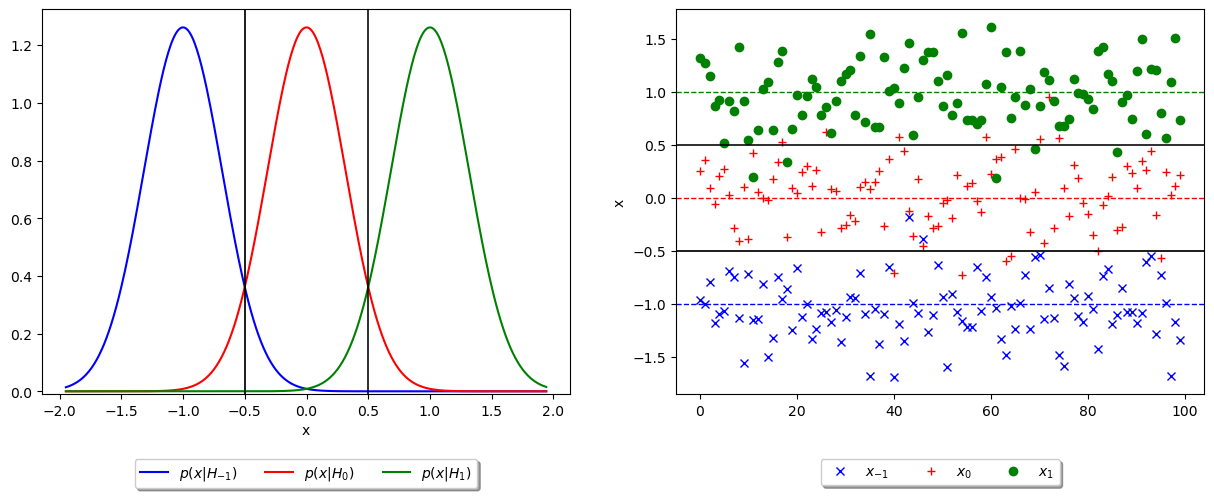

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal # This import is present but not used in the provided snippet
from scipy import stats


# Constants and experiment parameters
A = -1 # Amplitude under hypothesis H{-1}
B = 0 # Amplitude under hypothesis H{0}
C = 1 # Amplitude under hypothesis H{1}
PHA = 1/3 # Prior probability of hypothesis H{-1}
PHB = 1/3 # Prior probability of hypothesis H{0}
PHC = 1/3 # Prior probability of hypothesis H{1}
NoiseMean = 0  # Mean of the noise
# NoisePower = 1 # Mean power of the noise (variance)
NoisePower = 0.1 

# Decision region boundaries. These depend on the statistics
# and the values obtained from the discriminants.
R_AB = -1/2
R_BC = 1/2

# Create the range of observations. To be consistent, it should be below
# the minimum possible amplitude and above the maximum, considering
# means and variances. To be safe, we'll set it for a slightly worse case.
x_min = np.min(np.array([A, B, C])) - 2 * np.abs(NoiseMean) - 3 * np.sqrt(NoisePower)
x_max = np.max(np.array([A, B, C])) + 2 * np.abs(NoiseMean) + 3 * np.sqrt(NoisePower)
x_values = np.arange(x_min, x_max, 0.01)

# Create the probability density functions for each hypothesis
pdf_HA = stats.norm(A + NoiseMean, np.sqrt(NoisePower))
pdf_HB = stats.norm(B + NoiseMean, np.sqrt(NoisePower))
pdf_HC = stats.norm(C + NoiseMean, np.sqrt(NoisePower))


fig1, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])
# Plot the PDFs
axs[0].plot(x_values, pdf_HA.pdf(x_values), color='blue', label="$p(x|H_{-1})$")
axs[0].plot(x_values, pdf_HB.pdf(x_values), color='red', label="$p(x|H_{0})$")
axs[0].plot(x_values, pdf_HC.pdf(x_values), color='green', label="$p(x|H_{1})$")
# Plot decision region boundaries with black lines
axs[0].axvline(x=R_AB, color='black', linestyle='-', linewidth=1.25, alpha=1)
axs[0].axvline(x=R_BC, color='black', linestyle='-', linewidth=1.15, alpha=1)
axs[0].set_ylim(bottom=-0.01)
axs[0].set_xlabel('x')
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)

# Now let's simulate observations for the 3 hypotheses and see how
# the classifier behaves.
No = 100 # Number of observations per hypothesis
x_A = pdf_HA.rvs(size=No) # Generate random numbers according to p(x|H_A)
x_B = pdf_HB.rvs(size=No) # Generate random numbers according to p(x|H_B)
x_C = pdf_HC.rvs(size=No) # Generate random numbers according to p(x|H_C)
# Plot observations
axs[1].plot(x_A, color='blue', linestyle='', marker='x', label='$x_{-1}$')
axs[1].plot(x_B, color='red', linestyle='', marker='+', label='$x_0$')
axs[1].plot(x_C, color='green', linestyle='', marker='o', label='$x_1$')
# Plot true symbol values (without noise)
axs[1].axhline(y=A, color='blue', linestyle='--', linewidth=1, alpha=1)
axs[1].axhline(y=B, color='red', linestyle='--', linewidth=1, alpha=1)
axs[1].axhline(y=C, color='green', linestyle='--', linewidth=1, alpha=1)
# Plot decision region boundaries
axs[1].axhline(y=R_AB, color='black', linestyle='-', linewidth=1.25, alpha=1)
axs[1].axhline(y=R_BC, color='black', linestyle='-', linewidth=1.15, alpha=1)
axs[1].set_ylabel('x')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)

# Theoretical probability of error calculation
Pet_HA = (pdf_HA.cdf(R_BC)-pdf_HA.cdf(R_AB)) * PHA + (1-pdf_HA.cdf(R_BC)) * PHA
Pet_HB = pdf_HB.cdf(R_AB) * PHB + (1-pdf_HB.cdf(R_BC)) * PHB
Pet_HC = pdf_HC.cdf(R_AB) * PHC + (pdf_HC.cdf(R_BC)-pdf_HC.cdf(R_AB)) * PHC
Pet = Pet_HA + Pet_HB + Pet_HC

print(f"The theoretical classifier error probability is: {Pet:.3f}")

# Empirical probability of error calculation
Pee_HA = np.sum(x_A > R_AB)/No # No. of points under HA outside region HA / No. of HA
Pee_HB = (np.sum(x_B < R_AB) + np.sum(x_B > R_BC))/No # No. of points under HB outside region HB / No. of HB
Pee_HC = np.sum(x_C < R_BC)/No # No. of points under HC outside region HC / No. of HC
Pee = Pee_HA*PHA + Pee_HB*PHB + Pee_HC*PHC
print(f"The empirical classifier error probability is: {Pee:.3f}")

#### Example: Bayesian Naive Waveform Classifiers

In the case of signal classification with a known waveform, the starting point remains the same. If the signal records have $N$ samples, the observed signals would be of the type $\underline{x}=x[n]=\{ x[0], x[1], ...,x[N-1] \}$, and considering $M$ possible different waveforms, the problem formulation would be as follows:

\begin{equation}
H_0 : \underline{x} = \underline{s}_0 + \underline{w}\\
H_1 : \underline{x} = \underline{s}_1 + \underline{w}\\
\vdots \\
H_{M-1} : \underline{x} = \underline{s}_{M-1} + \underline{w}\\
 \tag{1}
\end{equation}
where $\underline{w}=w[n]=\{ w[0], w[1], ...,w[N-1] \}$ would be the $N$ noise components (uncertainty), which in this case we will assume are independent and identically distributed (i.i.d.) with a Gaussian distribution of mean $\mu=0$ and variance equal to the noise power $\sigma^2$, i.e.:

\begin{equation}
w[n]\sim N(0,\sigma^2) \quad \forall n
 \tag{22}
\end{equation} 

In this case, for each class or waveform $\underline{s}_k$, each of the samples $x[n]$ of the observed signal will follow a Gaussian distribution with variance equal to that of the noise and mean equal to the value of the corresponding sample of the waveform, meaning that under hypothesis $H_k$, for the *n-th* sample:

\begin{equation}
x[n]\sim N(s_k[n],\sigma^2)\sim \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x[n]-s_k[n])^2}{2\sigma^2}} \quad \forall n
 \tag{23}
\end{equation}

Now we would have to calculate the discriminant for each class $H_k$, which recalling (5) would be calculated as:

\begin{equation}
g_k(\underline{x})=\ln{p(\underline{x}|H_k)}+\ln{P(H_k)}+\ln{P(\underline{x})}
 \tag{24}
\end{equation}
where in this case the likelihood function $p(\underline{x}|H_k)$ would follow a multidimensional Gaussian distribution, as each sample is i.i.d. Gaussian. That is, the likelihood function could be calculated as the product of the likelihood functions of each sample:

\begin{equation}
p(\underline{x}|H_k)=\prod_{n=0}^{N-1}p(x[n]|H_k)=\prod_{n=0}^{N-1}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x[n]-s_k[n])^2}{2\sigma^2}}=(2\pi\sigma^2)^{-N/2}e^{-\frac{1}{2\sigma^2}(\underline{x}-\underline{s}_k)^T(\underline{x}-\underline{s}_k)}  
 \tag{25}
\end{equation}
and substituting the above into (24):

\begin{equation}
g_k(\underline{x})=-\frac{N}{2}\ln(2\pi\sigma^2)-\frac{1}{2\sigma^2}(\underline{x}-\underline{s}_k)^T(\underline{x}-\underline{s}_k)+\ln{P(H_k)}+\ln{P(\underline{x})}
 \tag{26}
\end{equation}

If we consider that $N$, $\sigma$, and $\ln{P(\underline{x})}$ are the same for all hypotheses, we can eliminate the first and last terms of the sum in all discriminants, and, by expanding the vector product:

\begin{equation}
g_k(\underline{x})=-\frac{1}{2\sigma^2}\left ( \sum_{n=0}^{N-1}x[n]^2 - 2\sum_{n=0}^{N-1}s_k[n]x[n] +\sum_{n=0}^{N-1}s_k[n]^2\right )+\ln{P(H_k)}
 \tag{27}
\end{equation}
where the first and third terms are the energies of the observed signal and the *k-th* waveform respectively:

\begin{equation}
E_x=\sum_{n=0}^{N-1}x[n]^2\\
E_k=\sum_{n=0}^{N-1}s_k[n]^2
 \tag{28}
\end{equation}
and substituting (28) into (27):

\begin{equation}
g_k(\underline{x})=-\frac{E_x}{2\sigma^2} + \frac{1}{\sigma^2}\sum_{n=0}^{N-1}s_k[n]x[n] -\frac{E_k}{2\sigma^2} +\ln{P(H_k)}
 \tag{29}
\end{equation}

If we eliminate the term containing the energy of the observation $E_{x}$ as it is the same for all hypotheses, and multiply both sides of the equality by $\sigma^2$, we obtain the new discriminant $g'_k(\underline{x})=\sigma^2g_k(\underline{x})$ such that:

\begin{equation}
g'_k(\underline{x})=\sum_{n=0}^{N-1}s_k[n]x[n] - \gamma_k
 \tag{30}
\end{equation}
where for each hypothesis $\gamma_k$ would be:
\begin{equation}
\gamma_k=\frac{E_k-2\sigma^2\ln{P(H_k)}}{2}
 \tag{31}
\end{equation}

If we carefully observe (30) and (31), we can make the following observations:
*   Maximizing $g'_k(\underline{x})$ is equivalent to maximizing $g_k(\underline{x})$ because the former is scaled by a positive constant.
*   The first term, which depends on the observation, is the correlation between the observation and each waveform.
*   If it were a communication system, generally all symbols have equal probability and the same energy, so $\gamma_k$ would be the same in all cases and we could eliminate it.

In this last case, which is common in communications, the problem reduces to correlating the observed signal (what is received) with all possible waveforms, and selecting the maximum among all results. This is often known as a bank of correlators or matched filters, and in its general version, it is graphically represented by the following scheme, which facilitates the design of the classification algorithm: